1. Task To Do:
• Implement the Logistic Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [6]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y


In [8]:
import numpy as np
def test_logistic_function():
  """
  Test cases for the logistic_function.
  """
  # Test with scalar input
  x_scalar = 0
  expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
  assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
  # Test with positive scalar input
  x_pos = 2
  expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
  assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
  # Test with negative scalar input
  x_neg = -3
  expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
  assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

# 4 5CS037 Worksheet - 6:Implementation of Sigmoid Regression from Scratch. Siman Giri

# Test with numpy array input
x_array = np.array([0, 2, -3])
expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals
# Use np.round to round the array element-wise and compare
assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
print("All tests passed!")
# Run the test case
test_logistic_function()

All tests passed!


Task To Do:
• Implement the Log - loss Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [9]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target value y’ inbetween {0-1}.
    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
    Returns:
    loss (float): loss/error value
    """
    import numpy as np

    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


Verifying the Intuition:

In [12]:
# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')



log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [21]:
def test_log_loss():
  """
  Test cases for the log_loss function.
  """
  import numpy as np
  # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
  y_true = 1
  y_pred = 1
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
  y_true = 0
  y_pred = 0
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
  # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 5: Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"
  print("All tests passed!")
# Run the test case
test_log_loss()

All tests passed!


Task To Do:
• Implement the Cost Function by completing the code or writing your own function.
• Make sure you pass the test case.

iMPLEMENTATION OF COST FUNCTION

In [3]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    import numpy as np

    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"

    n = len(y_true)
    loss_vec = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.sum(loss_vec) / n

    return cost


Testing the Cost Function:

In [5]:
import numpy as np
def test_cost_function():
  # Test case 1: Simple example with known expected cost
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])
  # Expected output: Manually calculate cost for these values
  # log_loss(y_true, y_pred) for each example
  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
  -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
  -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  # Call the cost_function to get the result
  result = cost_function(y_true, y_pred)
  # Assert that the result is close to the expected cost with a tolerance of 1e-6
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
  # Run the test case
test_cost_function()

Test passed for simple case!


Task To Do:
• Implement the vectorized cost function costfunction logreg Function by completing the
code or writing your own function.
• Make sure you pass the test case.

In [14]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b   # (n,d) · (d,) + scalar → (n,)

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)
    return cost


Testing the function

In [16]:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")


cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


Task To Do:
• Implement the compute gradient Function by completing the code or writing your own
function.
• Make sure you pass the test case.

In [19]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))

    # Compute gradients
    grad_w = -(1 / n) * np.dot(X.T, (y - y_pred))
    grad_b = -(1 / n) * np.sum(y - y_pred)

    return grad_w, grad_b


In [21]:
# Simple test case
X = np.array([[10, 20], [-10, 10]]) # shape (2, 2)
y = np.array([1, 0]) # shape (2,)
w = np.array([0.5, 1.5]) # shape (2,)
b = 1 # scalar
# Assertion tests
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


Task To Do:
• Implement the gradient descent Function by completing the code or writing your own
function.
• Make sure you pass the test case.

In [23]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        y_pred = 1 / (1 + np.exp(-(np.dot(X, w) + b)))
        cost = cost_function(y, y_pred)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [25]:
# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
y = np.array([1, 0]) # Shape (2,)
w = np.zeros(X.shape[1]) # Shape (2,) - same as number of features
b = 0.0 # Scalar
alpha = 0.1 # Learning rate
n_iter = 100000 # Number of iterations
# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True,
show_params=False)
# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

A simple assertion test for gradient descent Function:

In [27]:
# Simple assertion test for gradient_descent
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
  y = np.array([1, 0]) # Shape (2,)
  w = np.zeros(X.shape[1]) # Shape (2,)
  b = 0.0 # Scalar
  alpha = 0.1 # Learning rate
  n_iter = 100 # Number of iterations
  # Run gradient descent
  w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False,
  show_params=False)
  # Assertions
  assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed!")
# Run the test
test_gradient_descent()

All tests passed!


Task To Do:
• Implement the prediction Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [30]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = 1 / (1 + np.exp(-(np.dot(X, w) + b)))

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


A simple assertion test for Prediction Function:

In [32]:
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3, 2)
  w_test = np.array([1.0, -1.0]) # Shape (2,)
  b_test = 0.0 # Scalar bias
  threshold = 0.5 # Default threshold
  # Updated expected output
  expected_output = np.array([0, 1, 1])
  # Call the prediction function
  y_pred = prediction(X_test, w_test, b_test, threshold)
  # Assert that the output matches the expected output
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
  print("Test passed!")
test_prediction()

Test passed!


In [34]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.
    """
    # Initialize confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0.0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }
    return metrics


Putting Helper Function to Action - Sigmoid Regression for the dataset:
Dataset Used: "pima-indians-diabetes.data.csv"
1. Some Basic Data Operation, Loading, Analysis and Cleaning:

In [37]:
# Load dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dataset URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Column names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset
data_pima_diabetes = pd.read_csv(url, names=columns)

# Check the first few rows
print(data_pima_diabetes.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Some Basic Data Cleaning:

In [40]:
# Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in selected columns
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)

# Fill NaN with median values
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)

# Check dataset info
data_pima_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Train Test Split and Standard Scaling of the Data:

In [42]:
# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (614, 8)
X_test_scaled shape: (154, 8)


Training of the Sigmoid Regression:


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


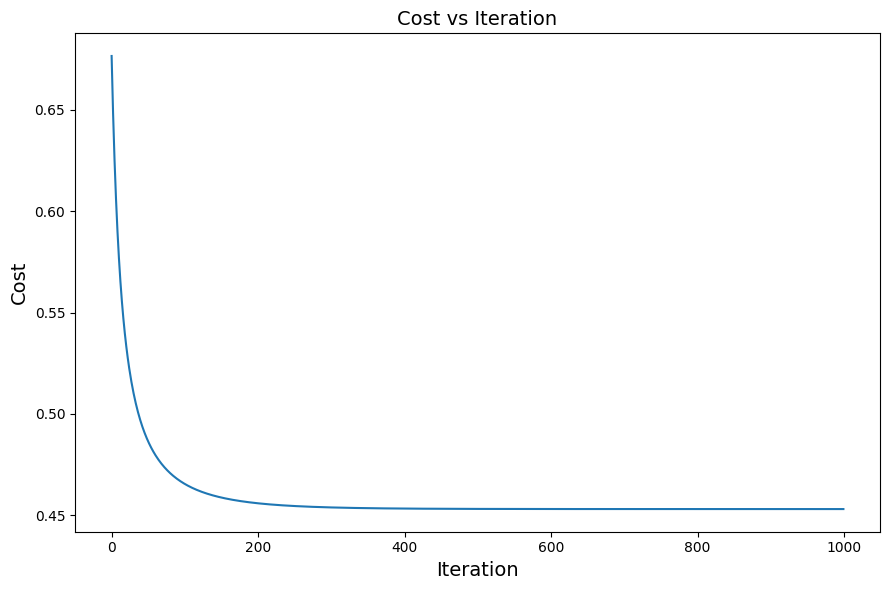

In [44]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
# Train model

print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter,
show_cost=True, show_params=False)
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()


Did the Model Overfitt or Underfitt?

In [46]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)
# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


How well my model did?


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.6000
Recall: 0.5000
F1-Score: 0.5455


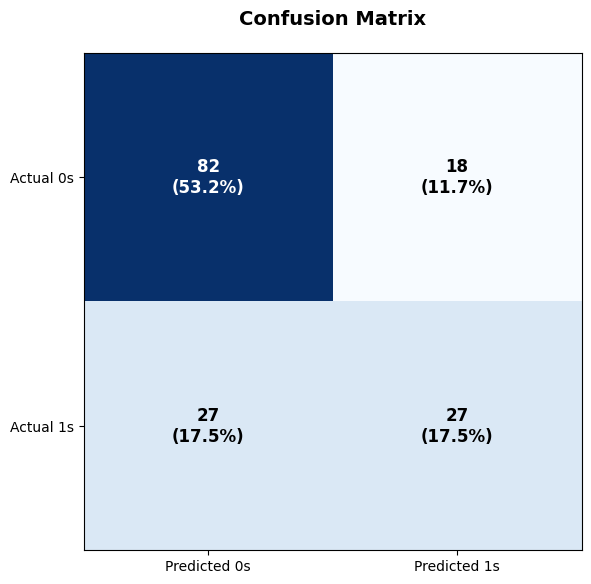

In [49]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
metrics = evaluate_classification(y_test, y_test_pred)
confusion_matrix = metrics["confusion_matrix"]
precision = metrics["precision"]
recall = metrics["recall"]
f1_score = metrics["f1_score"]

print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Optional - Visualizing the Confusion Matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

# Add text annotations
for i in range(2):
    for j in range(2):
        value = confusion_matrix[i, j]
        # Choose text color based on cell value (dark or light background)
        text_color = 'white' if value > confusion_matrix.max()/2 else 'black'
        ax.text(j, i, f'{value}\n({value/len(y_test)*100:.1f}%)',
                ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')

# Add title
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()